In [1]:
from DiabetesModels import *

# Parameters for simulation
environment = read_env(ndim=2)

# Setup simulation from env dict
simulation = Simulation(environment._asdict())
# Get idea of paars to change
environment

# Turn notebook into script
# !jupyter nbconvert --to script config_template.ipynb


env(path='debug/', maxPatient=1000, patientNr=0, path_to_simulations='simulations/', nMeals=200, ndim=2, loss_fun='CGP', jupyter=True, hypoglycemia=5, target=5, patient_filter=True)

In [2]:
# Change parameters of simulation here if you want to
# look above!
# simulation.par = xxx
simulation.patientNr = 2
simulation.loss_fun = 'CGP'
simulation.nMeals = 50 
simulation.patient_filter = True
simulation.hypoglycemia = 5.0
#simulation.hypoglycemia = 4.2
## Initiate simulation for patient

# print environment for debugging purposes
simulation_tuple = namedtuple('debug_tuple', simulation.__dict__)
print(simulation_tuple(**simulation.__dict__))

debug_tuple(path='debug/', maxPatient=1000, patientNr=2, path_to_simulations='simulations/', nMeals=50, ndim=2, loss_fun='CGP', jupyter=True, hypoglycemia=5.0, target=5, patient_filter=True)


In [3]:
Meal_range = np.linspace(0,20, 50)
Bolus_range = np.linspace(0,1000, 100)

patient.simulate(0,0,patient.xSS,nsimHours = 6,Ts = 5, kappa = 100, set_end_points = False, obj_fun = True)

NameError: name 'patient' is not defined

In [ ]:
Meal_grid, Bolus_grid = np.meshgrid(Meal_range, Bolus_range, indexing = 'ij')

CGP_grid = np.zeros(Meal_grid.shape)


In [ ]:
for i in tqdm(range(CGP_grid.shape[0]), leave = False):
    for j in tqdm(range(CGP_grid.shape[1]), leave = False):
        meal = Meal_grid[i,j]
        bolus = Bolus_grid[i,j]
        CGP_grid[i,j] = patient.simulate(bolus,meal,patient.xSS,nsimHours = 6,Ts = 5, kappa = 100, set_end_points = False, obj_fun = True)



In [ ]:
CGP_opt = []

for x,y in zip(patient.u_opt, patient.u_opt_meal_range):
    CGP_opt.append(patient.simulate(x,y,patient.xSS,nsimHours = 6,Ts = 5, kappa = 100, set_end_points = False, obj_fun = True))

In [ ]:
def prior_mean(bolus, meal, scaling = 1/7):
    return scaling * ((bolus - meal * 1/patient.ICR)**2) + 1/patient.ICR * 1/2 * meal ** 2

In [ ]:
def prior_mean_basic(bolus, meal, scaling = 1/7):
    return scaling * ( (bolus - meal * 1/patient.ICR)**2)

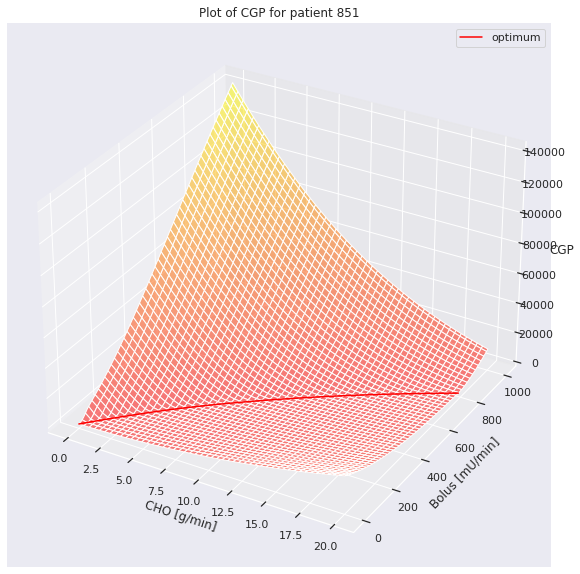

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

ax.plot_surface(Meal_grid, Bolus_grid, CGP_grid, alpha = 0.5, cmap=cm.autumn)
ax.plot3D(patient.u_opt_meal_range, patient.u_opt, CGP_opt, 'red', label = 'optimum');
ax.set_title(f'Plot of CGP for patient {patientNr}')
ax.set_xlabel('CHO [g/min]')
ax.set_ylabel('Bolus [mU/min]')
ax.set_zlabel('CGP')
plt.legend()
plt.savefig('figures/CGP.pdf', dpi = 150, bbox_inches='tight')
plt.show()

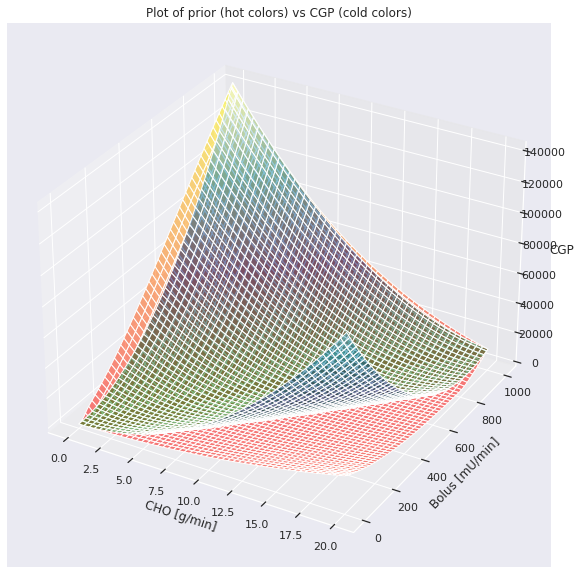

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

ax.plot_surface(Meal_grid, Bolus_grid, CGP_grid, alpha = 0.5, cmap=cm.autumn)
ax.plot_surface(Meal_grid, Bolus_grid, prior_grid, alpha = 0.5, cmap = cm.ocean)


ax.set_title('Plot of prior (hot colors) vs CGP (cold colors)')
ax.set_xlabel('CHO [g/min]')
ax.set_ylabel('Bolus [mU/min]')
ax.set_zlabel('CGP')
plt.savefig('figures/prior_CGP.pdf', dpi=150, bbox_inches='tight')
plt.show()

NameError: name 'Meal_grid' is not defined

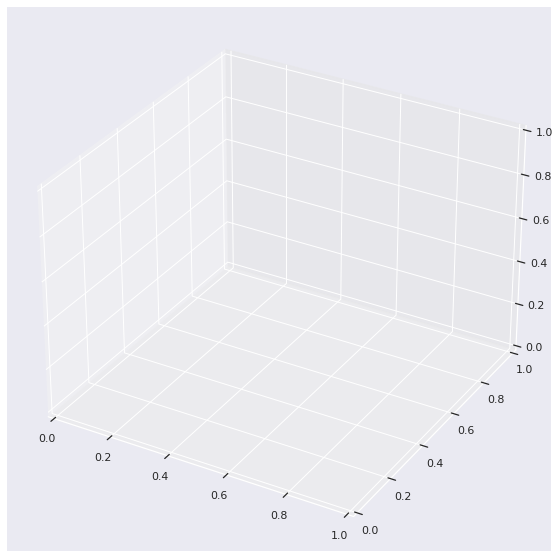

In [4]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

ax.plot_surface(Meal_grid, Bolus_grid, prior_grid, alpha = 0.5, cmap=cm.autumn)
ax.plot_surface(Meal_grid, Bolus_grid, prior_grid_basic, alpha = 0.5,cmap = cm.ocean)

ax.set_title('Visualising $K \cdot d^2$ term - With (cold colors) without (hot colors)')
ax.set_xlabel('CHO [g/min]')
ax.set_ylabel('Bolus [mU/min]')
ax.set_zlabel('CGP')
plt.savefig('figures/prior_term.pdf',dpi=150, bbox_inches='tight')
plt.show()